In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Activity 7b: Non-Linear Systems

This is the last activity of the course! We've come a long way. Almost all the systems we've dealt with so far, beyond activity 2, have been linear systems with the form:

$$ \frac{d}{dt} \vec{y} = A \vec{y} + \vec{F} $$

And we've been able to solve them with either the eigenvalue/vector method (for homogeneous systems) or the Laplace Transform (for non-homogeneous systems). The nice thing about linear systems is that we can add two solutions to a linear system together to create new solutions. This makes it easy to break a problem down into peices that can be reassembled to work in different situations.

The bad news about linear systems is that they're actually pretty rare in the real world. Most problems in the real world are *non-linear*. For example, a real spring only approximately obeys Hooke's Law ($\vec{F}_s = -k \vec{s}$), and then only over a limited range of stretches. If you compress or stretch too much, the spring deviates significantly from this linear relationship. Another example is the fox/chicken model from Activity 2. You may remember that the rate of change of the foxes, and the rate of change of the chickens each depended on the current number of foxes and chickens:

Where $f$ is the population density of foxes, and $c$ is the density of chickens. Here's a plausible model:

$$\frac{df}{dt} = -f/2 + 0.05 f c$$

So the fox population would fall with a time constant of about two months without any chickens. If there are enough chickens however, then the fox population could grow.

$$ \frac{dc}{dt} = +c/4 - 0.05 f c$$

Here the chicken popluation would grow with a time constant of about four months in the absense of foxes, but if there are foxes it will begin to drop.

We could call the population *vector* $\vec{p}$ containing both the fox and the chicken populations:

$$ \vec{p} = \begin{bmatrix} f \\ c \end{bmatrix} $$

Then we could write something like this:

$$ \frac{d}{dt} \vec{p} =
\begin{bmatrix} \frac{df}{dt} \\ \frac{dc}{dt} \end{bmatrix} =
\begin{bmatrix} -f/2 + 0.05 f c \\ +c/4 - 0.05 f c \end{bmatrix}
$$

Because of the product terms ($ 0.05 f c $) there's no way to write this as a matrix times the $\vec{p}$ vector. So it's a non-linear system. How did we solve it? We didn't really *solve* it, we calculated the population as a function of time *numerically*.

Just to remind you, it went something like this:






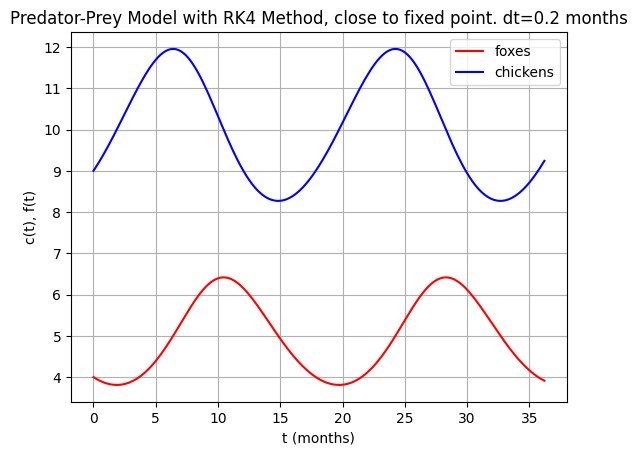

In [43]:
c0 = 9
f0 = 4

def RK4Step(s, f, t, dt):
    f1 = f(s,t)
    f2 = f(s+f1*dt/2, t+dt/2)
    f3 = f(s+f2*dt/2, t+dt/2)
    f4 = f(s+f3*dt, t+dt)
    return s + (f1 + 2*f2 + 2*f3 + f4)*dt/6

def dfdt(c,f):
    "numpy function to compute dfdt"
    return -f/2 + 0.05 * f * c

def dcdt(c,f):
    "numpy function to compute dcdt"
    return +c/4 - 0.05 * f * c

def f_interaction(s, t):
    "numpy function to compute vector derivative"
    c = s[0]
    f = s[1]
    return np.array([dcdt(c,f), dfdt(c,f)])

s = np.array([c0, f0]) # intialize the state with c0, f0

t = 0
tmax = 36
dt = 0.2
cList = [c0]
fList = [f0]
tList = [t]

while t < tmax:
    s = RK4Step(s, f_interaction, t, dt)
    t = t + dt
    cList.append(s[0])
    fList.append(s[1])
    tList.append(t)

plt.plot(tList, fList, 'r-', label='foxes')
plt.plot(tList, cList, 'b-', label='chickens')
plt.grid()
plt.xlabel("t (months)")
plt.ylabel("c(t), f(t)")
plt.title(f"Predator-Prey Model with RK4 Method, close to fixed point. dt={dt:0.1f} months")
plt.legend(loc="upper right")

Let's also look at the phase portrait for this system.

Text(0.5, 1.0, 'Predator-Prey Model Phase Portrait, Close to fixed point')

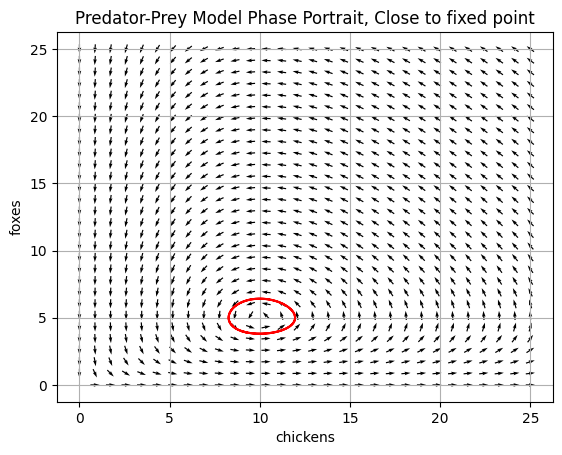

In [4]:
#
# let's build a trajectory graph for the predator-prey model
#
# Note this is not showing slopes over time, but directions in the c-f plane
#

fdomain = np.linspace(0,25,30) # foxes
cdomain = np.linspace(0,25,30) # chickens

c,f = np.meshgrid(cdomain, fdomain)

s = np.array([c,f])

u,v = f_interaction(s, 0) # get dc/dt and df/dt for all the values of c and f.
uvmag = np.sqrt(u**2+v**2) # magnitude of u,v field for scaling
uvmag = np.where(uvmag<1e-10,1,uvmag) # just avoid dividing by zero

plt.quiver(c,f,u/uvmag,v/uvmag,pivot='mid')
plt.plot(cList,fList,'r-')
plt.grid()
plt.xlabel("chickens")
plt.ylabel("foxes")
plt.title(f"Predator-Prey Model Phase Portrait, Close to fixed point")

So it's clear that the populations vary periodically somehow, so it *almost* looks like a mass on a spring, but you can see the far from the fixed point the orbits are pretty different. Let's look at one of those orbits starting with c=4 and f=2:

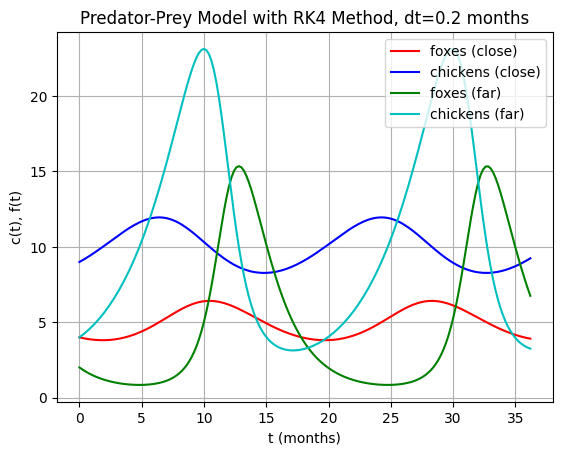

In [5]:
c1 = 4
f1 = 2

s = np.array([c1, f1]) # new starting point
t = 0

cList2 = [c1]
fList2 = [f1]

while t < tmax:
    s = RK4Step(s, f_interaction, t, dt)
    t = t + dt
    cList2.append(s[0])
    fList2.append(s[1])

plt.plot(tList, fList, 'r-', label='foxes (close)')
plt.plot(tList, cList, 'b-', label='chickens (close)')
plt.plot(tList, fList2, 'g-', label='foxes (far)')
plt.plot(tList, cList2, 'c-', label='chickens (far)')
plt.grid()
plt.xlabel("t (months)")
plt.ylabel("c(t), f(t)")
plt.title(f"Predator-Prey Model with RK4 Method, dt={dt:0.1f} months")
plt.legend(loc="upper right")

Still "periodic" but *far* from sinusoidal! Can you see that that period for the "close" motion is also different from (shorter than) the period for the "far" motion? How can we understand this more theoretically? That's the main goal if this activity. We'll learn how to expand the non-linear equations in the neighborhood of the fixed point.

Where is the fixed point? You can see from the phase portrait it's around c=10, f=5. You can also see this from the equations for $dc/dt$ and $df/dt$.

Let's add the "far" trajectories to the phase portrait:

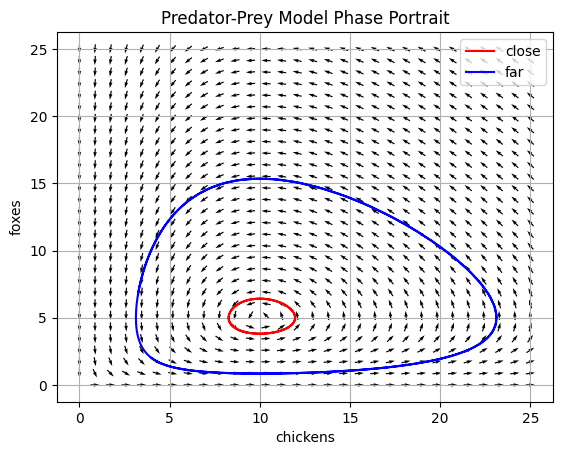

In [6]:
plt.quiver(c,f,u/uvmag,v/uvmag,pivot='mid')
plt.plot(cList,fList,'r-', label="close")
plt.plot(cList2, fList2, 'b-', label="far")
plt.grid()
plt.xlabel("chickens")
plt.ylabel("foxes")
plt.title(f"Predator-Prey Model Phase Portrait")
plt.legend()

## Contour plot for $dc/dt$

Let's look at $dc/dt$ and $df/dt$ separately. See the contour plot below for $dc/dt$. Note that there is a horizontal line where $dc/dt$ is zero when $f=5$. What does this mean? It means that when the fox population is at the value of 5, the rate of change of the chicken population is zero. What does *that* mean? It means that when $f=5$ the chicken population is not *changing*. What if $f\neq5$? It depends, if $f>5$ then evidently $dc/dt$ will be less than zero (decreasing population) and if $f>5$ then $dc/dt$ will be greater than zero (increasing population).

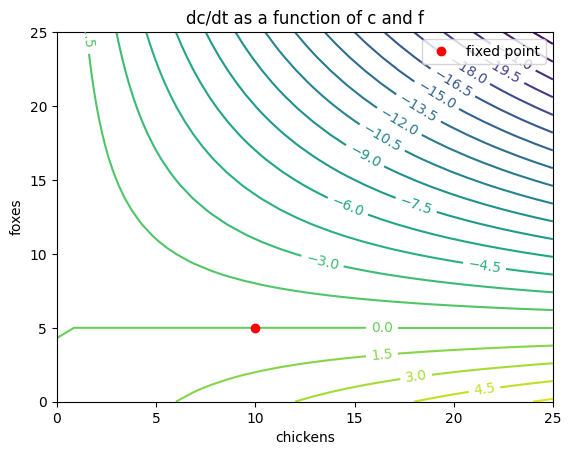

In [41]:
CS=plt.contour(c,f,u,20)
plt.clabel(CS)
plt.plot([10],[5],'ro',label='fixed point')
plt.title("dc/dt as a function of c and f")
plt.xlabel("chickens")
plt.ylabel("foxes")
plt.legend()

So in the neighborhood of the fixed point $dc/dt$ doesn't depend on $c$ at all, it only depends on $f$. Let's look a the behavior of $dc/dt$ around the fixed point as we vary $f$.

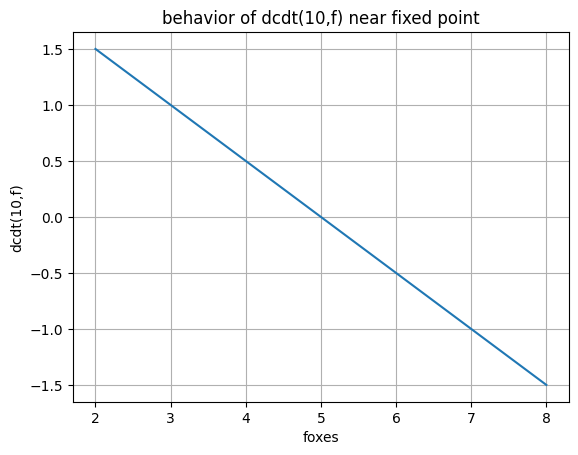

In [57]:
frange = np.linspace(2,8)
plt.plot(frange,dcdt(10,frange))
plt.xlabel("foxes")
plt.ylabel("dcdt(10,f)")
plt.title("behavior of dcdt(10,f) near fixed point")
plt.grid()


Cool! It's *linear* if we look near the fixed point. Let's plot that another way, using $\delta_f = f - f_{\rm fixed}$ the deviation of $f$ from the fixed point value.

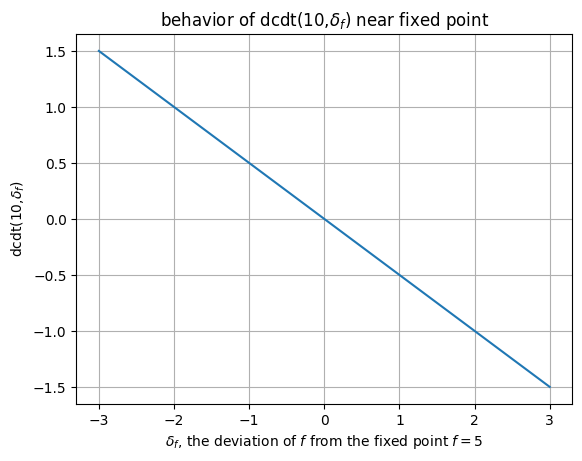

In [62]:
plt.plot(frange-5,dcdt(10,frange))
plt.xlabel("$\delta_f$, the deviation of $f$ from the fixed point $f=5$")
plt.ylabel("dcdt(10,$\delta_f$)")
plt.title("behavior of dcdt(10,$\delta_f$) near fixed point")
plt.grid()


You can see from the graph that the graph of $dc/df$ has a slope of -0.5 relative to $\delta_f$ near the fixed point. In other words we can approximate:

$$ \frac{dc}{dt} \approx 0 \times \delta_c - 0.5 \times \delta_f $$

when we're near the fixed point.

Similarly we can play the same game with $df/dt$, see below:

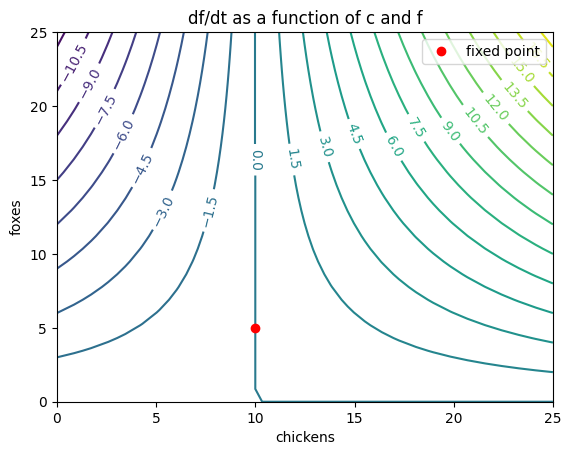

In [58]:
CS=plt.contour(c,f,v,20)
plt.clabel(CS)
plt.plot([10],[5],'ro',label='fixed point')
plt.title("df/dt as a function of c and f")
plt.xlabel("chickens")
plt.ylabel("foxes")
plt.legend()

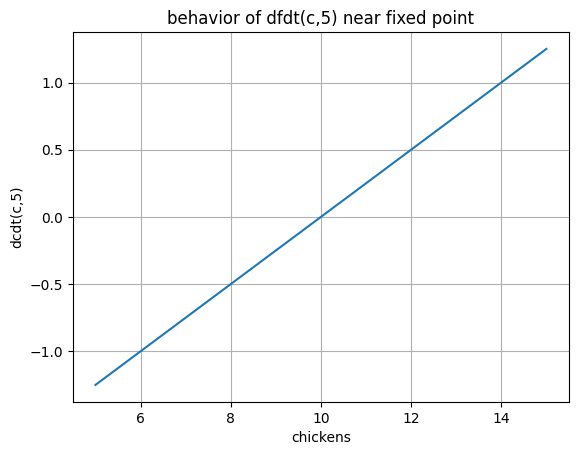

In [72]:
crange = np.linspace(5,15)
plt.plot(crange,dfdt(crange,5))
plt.xlabel("chickens")
plt.ylabel("dcdt(c,5)")
plt.title("behavior of dfdt(c,5) near fixed point")
plt.grid()


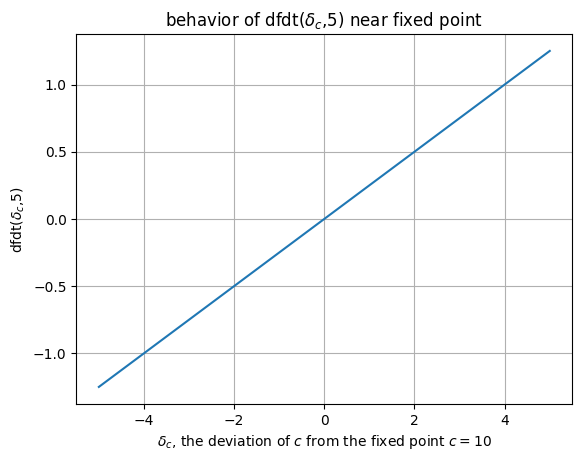

In [73]:
plt.plot(crange-10,dfdt(crange,5))
plt.xlabel("$\delta_c$, the deviation of $c$ from the fixed point $c=10$")
plt.ylabel("dfdt($\delta_c$,5)")
plt.title("behavior of dfdt($\delta_c$,5) near fixed point")
plt.grid()


You can see from the graph that the graph of $df/dt$ has a slope of +0.25 relative to $\delta_c$ near the fixed point. In other words we can approximate:

$$ \frac{df}{dt} \approx +0.25 \times \delta_c + 0 \times \delta_f $$

when we're near the fixed point.

One more thing. The fixed point is *fixed*. This means that the derivative of $f$ with respec to $t$ is the *same* as the derivative of $\delta_f$ with respect to $t$. So just like we had a vector with $c$ and $f$, we can have a vector with $\delta_c$ and $\delta_f$. Wait! This means that in terms of $\delta_c$ and $\delta_f$, so long as we only look around the fixed point, we have an approximately *linear* system:

$$ \frac{d}{dt}\begin{bmatrix} \delta_c \\ \delta_f \end{bmatrix} \approx
\begin{bmatrix} 0 & -0.5 \\ +0.25 & 0 \end{bmatrix} \begin{bmatrix} \delta_c \\ \delta_ft \end{bmatrix} $$

This is the key to the whole business of analytically dealing with non-linear systems in the neighborhood of a fixed point. We can evaluate them near a fixed point, and they behave approximately like linear systems and we can use all our linear system techniques (e.g., eigenvalue/vector, Laplace, etc.) to solve them.

Let's do it!

I'm going to call the system vector $\vec{p}$ but it's just the same old thing:

$$ \vec{p} = \begin{bmatrix} \delta_c \\ \delta_f \end{bmatrix} $$

Also, since we've already defined a bunch of variables as numerical values, I'll need to use new variable names for the sympy work. Let's add `_s` as a suffix to the symbolic variables that match a numpy variable name so we can keep them straight. Let's set this up in numpy:


In [80]:
c_s, f_s, t_s, = sp.symbols("c,f,t", real=True, positive=True)
dc,df = sp.symbols("delta_c,delta_f", real=True)

In [102]:
dcdt_s = +c_s/4 - f_s * c_s/20
dfdt_s = -f_s/2 + f_s * c_s/20

dpdt = sp.Matrix([dcdt_s, dfdt_s])
dpdt

Matrix([
[-c*f/20 + c/4],
[ c*f/20 - f/2]])

In [103]:
p = sp.Matrix([c_s, f_s])
p

Matrix([
[c],
[f]])

Let's create the matrix from above by taking the slopes as we did before. This matrix, by the way, has a fancy name. It's called the "Jacobian" matrix. Don't stress about it though, it's just the slopes of the $dc/dt$ and $df/dt$ surfaces in the $c$ and $f$ directions.

In [104]:
jac = sp.Matrix([[dcdt_s.diff(c_s), dcdt_s.diff(f_s)],[dfdt_s.diff(c_s), dfdt_s.diff(f_s)],])
jac

Matrix([
[1/4 - f/20,      -c/20],
[      f/20, c/20 - 1/2]])

Let's evaluate this matrix at the fixed point (10,5) and see what we get:

In [105]:
jac.subs({c_s:10, f_s:5})

Matrix([
[  0, -1/2],
[1/4,    0]])

Bingo! just what we got before by looking at the graphs. You can also substitute the values in the Jacobian itself and see how it works.

Note: You don't have to calculate the jacobian manually, there is a sympy convenience function that can do it for you. See below:

In [106]:
jac = dpdt.jacobian(p)
jac

Matrix([
[1/4 - f/20,      -c/20],
[      f/20, c/20 - 1/2]])

In [107]:
# verify the fixed point

solns = sp.solve(dpdt,p)
solns

[(10, 5)]

In [108]:
# evaluate the jacobian at the fixed point:

A = jac.subs({c_s:solns[0][0], f_s:solns[0][1]})
A

Matrix([
[  0, -1/2],
[1/4,    0]])

Now, we're back to our old friend:

$$ \frac{d\vec{x}}{dt} = A \vec{x} $$

let's diagonalize the matrix $A$ and get to work!

In [109]:
P,D = A.diagonalize()
P,D

(Matrix([
 [-sqrt(2)*I, sqrt(2)*I],
 [         1,         1]]),
 Matrix([
 [-sqrt(2)*I/4,           0],
 [           0, sqrt(2)*I/4]]))

In [110]:
y0 = sp.Matrix([-1,-1]) # start with delta_c and delta_f = -1,-1 (c=9, f=4)
y = P*sp.exp(D*t_s)*P.inv()*y0
re_parts, im_parts = y.as_real_imag()

In [111]:
dc_soln = re_parts[0]
df_soln = re_parts[1]
dc_soln

sqrt(2)*sin(sqrt(2)*t/4) - cos(sqrt(2)*t/4)

In [112]:
df_soln

-sqrt(2)*sin(sqrt(2)*t/4)/2 - cos(sqrt(2)*t/4)

Excellent, we have symbolic solutions for the linearized system. We can evaluate the frequency ($\omega=\sqrt{2}/4$) and amplitudes of the population oscillation! Cool!

Let's plot those with the numerical solutions for the "near" fixed point trajectories.

In [121]:
dfn = sp.lambdify(t_s,df_soln,'numpy') # get functions to evaluate numerically
dcn = sp.lambdify(t_s,dc_soln,'numpy')

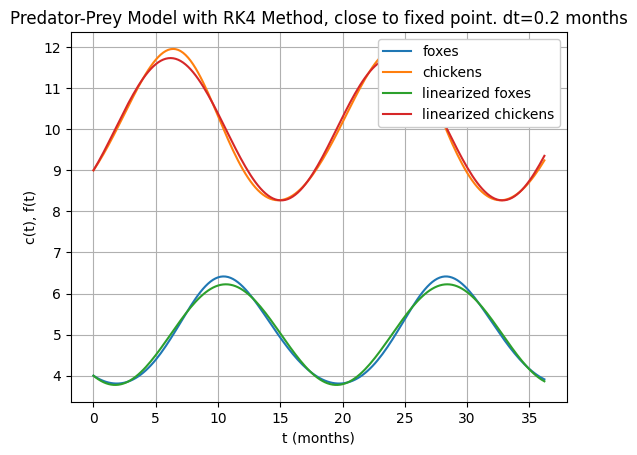

In [122]:
plt.plot(tList, fList, label='foxes')
plt.plot(tList, cList, label='chickens')
plt.plot(tList, 5 + dfn(np.array(tList)), label='linearized foxes')
plt.plot(tList, 10 + dcn(np.array(tList)), label='linearized chickens')
plt.grid()
plt.xlabel("t (months)")
plt.ylabel("c(t), f(t)")
plt.title(f"Predator-Prey Model with RK4 Method, close to fixed point. dt={dt:0.1f} months")
plt.legend(loc="upper right", framealpha=1)

You can see it's not exact, but it's close! As you get closer to the fixed point the accuracy improves. Of course, as you get farther from the fixed point, the opposite is true. 😞

## Competing species example

There's a similar set of equations that we'll study in a separate example called a "competing species" model, where each species can grow exponentially, or logistically (i.e., with a carrying capacity) on their own but when the other species is present there's an "interaction term" representing competition for a shared resource (e.g., food, habitat, whatever.)

$$ \frac{dx}{dt} = ax(K-x)-bxy $$


$$ \frac{dy}{dt} = cy(M-y)-dxy $$



# Now it's your turn!

Pick any of the problems from section 5.3 in Charnley's book. Using that system, answer the questions below.

a. What does this system of differential equations represent? Explain. Does this system of differential equations fit with either a competing species model or a predator-prey model? If it is predator-prey, which species is the predator? Explain.

b. Find and classify the critical point (if it exists) with both x > 0 and y > 0.

c. Describe the long term behavior of the system. Is it stable? Does it go to zero or infinity? If this depends on the initial condition, say so.

d. Evaluate the time evolution of the system numerically from one or more initial conditions. Make a graph of this result.

e. Create a phase portrait of the system showing the critical/fixed points as well as the trajectory you evaluated in (d) above.

f. Create a linearized model of the system that's valid in the vicinity of one of the critial points that is close to the motion graphed in (d).

g. Graph the linearized model overlaid on the graph from (d).